In [159]:
import pandas as pd

import matplotlib.pyplot as plt


In [160]:
# https://archive.ics.uci.edu/ml/datasets/Credit+Approval
df = pd.read_csv('d:/tmp/credit-approval/crx.data',
                names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
                      'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
                      'A13', 'A14', 'A15', 'y'],
                na_values=['?', 'nan'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [161]:
# Objective: classify "approved" or "denied" based on credit data 

In [162]:
# Plotting PCA

# check for null / NaN 
df[df.isnull().any(axis=1)]

# drop
df.dropna(inplace=True)

# check again for null / NaN (make sure drop worked)
df.isnull().any()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
A1     653 non-null object
A2     653 non-null float64
A3     653 non-null float64
A4     653 non-null object
A5     653 non-null object
A6     653 non-null object
A7     653 non-null object
A8     653 non-null float64
A9     653 non-null object
A10    653 non-null object
A11    653 non-null int64
A12    653 non-null object
A13    653 non-null object
A14    653 non-null float64
A15    653 non-null int64
y      653 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


In [163]:
from sklearn.preprocessing import LabelEncoder

# label encode and append columns (data set is very small)
for col in ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'y']:
    col_name = col + '_encoded'
    
    # append encoded column to dataframe as new column
    df[col_name] = LabelEncoder().fit_transform(df.loc[:, col])
    
df.iloc[0, :]

A1                 b
A2             30.83
A3                 0
A4                 u
A5                 g
A6                 w
A7                 v
A8              1.25
A9                 t
A10                t
A11                1
A12                f
A13                g
A14              202
A15                0
y                  +
A1_encoded         1
A4_encoded         1
A5_encoded         0
A6_encoded        12
A7_encoded         7
A9_encoded         1
A10_encoded        1
A12_encoded        0
A13_encoded        0
y_encoded          0
Name: 0, dtype: object

In [164]:
# Create X

# Remove columns in 'to_encode' from df.columns..
# df = df.loc[:, df.columns.difference(to_encode)]

X_cols = ['A1_encoded', 'A2', 'A3', 'A4_encoded', \
 'A5_encoded', 'A6_encoded', 'A7_encoded', 'A8', \
 'A9_encoded', 'A10_encoded', 'A11', 'A12_encoded', \
 'A13_encoded', 'A14', 'A15']

X = df.loc[:, X_cols]

# Create y
y_col = 'y_encoded'

y = df.loc[:, y_col]
y==0

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
659    False
660    False
661    False
662    False
663    False
664    False
665    False
666    False
667    False
668    False
669    False
670    False
671    False
672    False
674    False
675    False
676    False
677    False
678    False
679    False
680    False
681    False
682    False
683    False
684    False
685    False
686    False
687    False
688    False
689    False
Name: y_encoded, Length: 653, dtype: bool

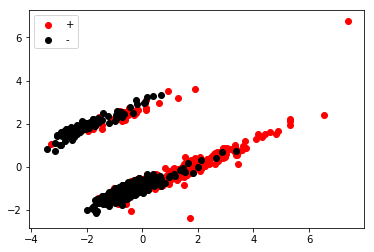

In [172]:
# PCA plotting
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)

X_scaled_2d = PCA(n_components=2).fit_transform(X_scaled)

fig, ax = plt.subplots()

# PCA (X1, ... X15) -> X1_pca, X2_pca, X3_pca, X4_pca
#
# X_scaled_2d[row_indexer, col_indexer]

# X1_pca: X_scaled_2d[[True, True, ], 0]
#         X_scaled_2d[ y==0         , 0] 
#
#    row indexer = [True, True, ... ] : y==0
#    col indexer = 0

# X2_pca: X_scaled_2d[[True, True], 1]
#         X_scaled_2d[ y==0       , 1] 
#
#    row indexer = [True, True, ... ] : y==0
#    col indexer = 1

# X3_pca: X_scaled_2d[[True, True], 2]
#
#    row indexer = [True, True, ... ] : y==0
#    col indexer = 2

# X4_pca: X_scaled_2d[[True, True], 3]
#
#    row indexer = [True, True, ... ] : y==0
#    col indexer = 3

#
ax.scatter(X_scaled_2d[y==0, 0], X_scaled_2d[y==0, 1], color='red',
           label='+')
ax.scatter(X_scaled_2d[y==1, 0], X_scaled_2d[y==1, 1], color='black',
           label='-')

ax.legend()

plt.show()

In [180]:
students = X_scaled_2d[:10, :]
print(students.shape)

(10, 2)


In [183]:
import numpy as np
cards = np.array(['Red', 'Blue', 'Red', 'Blue', 'Red',
         'Blue', 'Blue', 'Red', 'Blue', 'Red'])
print(cards.shape)

(10,)


In [186]:
cards=='Red'

array([ True, False,  True, False,  True, False, False,  True, False,
        True])

In [187]:
cards=='Blue'

array([False,  True, False,  True, False,  True,  True, False,  True,
       False])

In [184]:
students[cards=='Red']

array([[ 0.58122424, -0.75023781],
       [-0.26180459, -1.08682528],
       [-0.55106179, -1.48914162],
       [ 0.11319559, -0.90098553],
       [-0.72633191,  2.4712327 ]])

In [185]:
students[cards=='Blue']

array([[ 2.37473081,  0.1648879 ],
       [ 1.36786005, -0.28268391],
       [ 0.07060724, -0.78986066],
       [ 1.21089945, -0.48329387],
       [-0.7978208 ,  2.60565877]])

In [ ]:
# Train without GridSearchCV

# Step 7 (cheatsheet)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 
# X = df.loc[:, X_cols]
# y = df.loc[:, y_col]
#
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Step 8
scaler_X = StandardScaler()

# fit transform on training X
X_scaled_train = scaler_X.fit_transform(X_train)

# transform (don't fit) on test X
X_scaled_test = scaler_X.transform(X_test)

# Step 9
lr = LogisticRegression(random_state=42)
lr.fit(X_scaled_train, y_train)
y_pred = lr.predict(X_scaled_test)
y_prob = lr.predict_proba(X_scaled_test)

#print(y_pred)
#print(y_prob)

In [ ]:
# Train with GridSearchCV

# Step 7 (cheatsheet)
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 8
scaler_X = StandardScaler()
# fit transform on training X
X_scaled_train = scaler_X.fit_transform(X_train)
# transform (don't fit) on test X
X_scaled_test = scaler_X.transform(X_test)

# Step 9 - GridSearchCV

#penalty : str, 'l1' or 'l2', default: 'l2'
#    Used to specify the norm used in the penalization. The 'newton-cg',
#    'sag' and 'lbfgs' solvers support only l2 penalties.

#tol : float, default: 1e-4
#    Tolerance for stopping criteria.

# C : float, default: 1.0
#  Inverse of regularization strength; must be a positive float.
#  Like in support vector machines, smaller values specify stronger
#  regularization.

param_grid = {
    'penalty' : ['l1', 'l2'],
    'tol' : [1e-1, 1e-2, 1e-4, 1e-6],
    'C' : [1e-2, 1e-1, 1.0, 10, 20]
}

gs = GridSearchCV(LogisticRegression(random_state=42),
                  param_grid,
                  verbose=True)

gs.fit(X_scaled_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

y_pred = gs.predict(X_scaled_test)
y_prob = gs.predict_proba(X_scaled_test)

In [ ]:
# Confusing metrics

             precision    recall  f1-score   support

          0       0.79      0.94      0.86        71
          1       0.95      0.81      0.87        93

avg / total       0.88      0.87      0.87       164



[Text(0,0.5,'Denied'), Text(0,1.5,'Approved')]

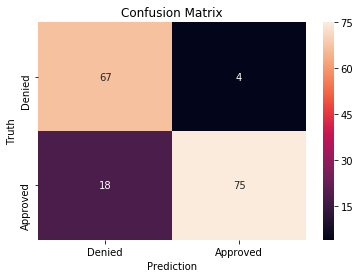

In [166]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Denied', 'Approved'])
ax.yaxis.set_ticklabels(['Denied', 'Approved'])

In [169]:
# ROC curve

(164, 2)

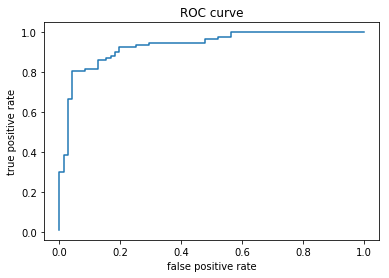

In [171]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

fig, ax = plt.subplots()

ax.plot(fpr, tpr, label='auc %f' % auc(fpr, tpr))
ax.set(title='ROC curve',
       xlabel='false positive rate',
       ylabel='true positive rate')

plt.show()